# Decision Tree Classififcatioin
import necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree

In [24]:
# to check precission we import precission
from sklearn.metrics import precision_score

In [27]:
# we try another metrics here ('recall)
from sklearn.metrics import recall_score

In [2]:
df= sns.load_dataset('titanic')

In [10]:
X= df[['pclass', 'age', 'sex', 'fare', 'sibsp', 'parch']]
y= df['survived']

In [13]:
# this program line mean that we convert categories into integers( in this case male and female into 0,1)
X=pd.get_dummies(X, columns=['sex'])

In [14]:
X.isnull().sum()

pclass          0
age           177
fare            0
sibsp           0
parch           0
sex_female      0
sex_male        0
dtype: int64

In [15]:
# fill the null values of age col by its mean
X['age'].fillna(X['age'].mean(), inplace=True)

In [16]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2)

In [17]:
model= DecisionTreeClassifier()
model.fit (X_train, y_train)

DecisionTreeClassifier()

In [18]:
y_pred= model.predict(X_test)

In [29]:
#print('Accuracy :', accuracy_score(y_test, y_pred))
# we will the code for precission
# print(precision_score(y_test, y_pred))
# we will the code for recall
print(recall_score(y_test, y_pred))

0.6875


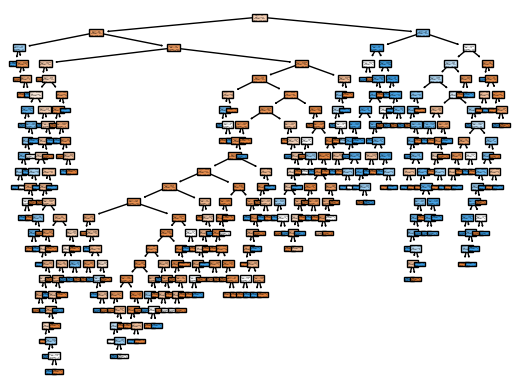

<Figure size 640x480 with 0 Axes>

In [30]:
tree.plot_tree(model.fit(X,y), filled=True)
plt.show()
plt.savefig('tree.png')

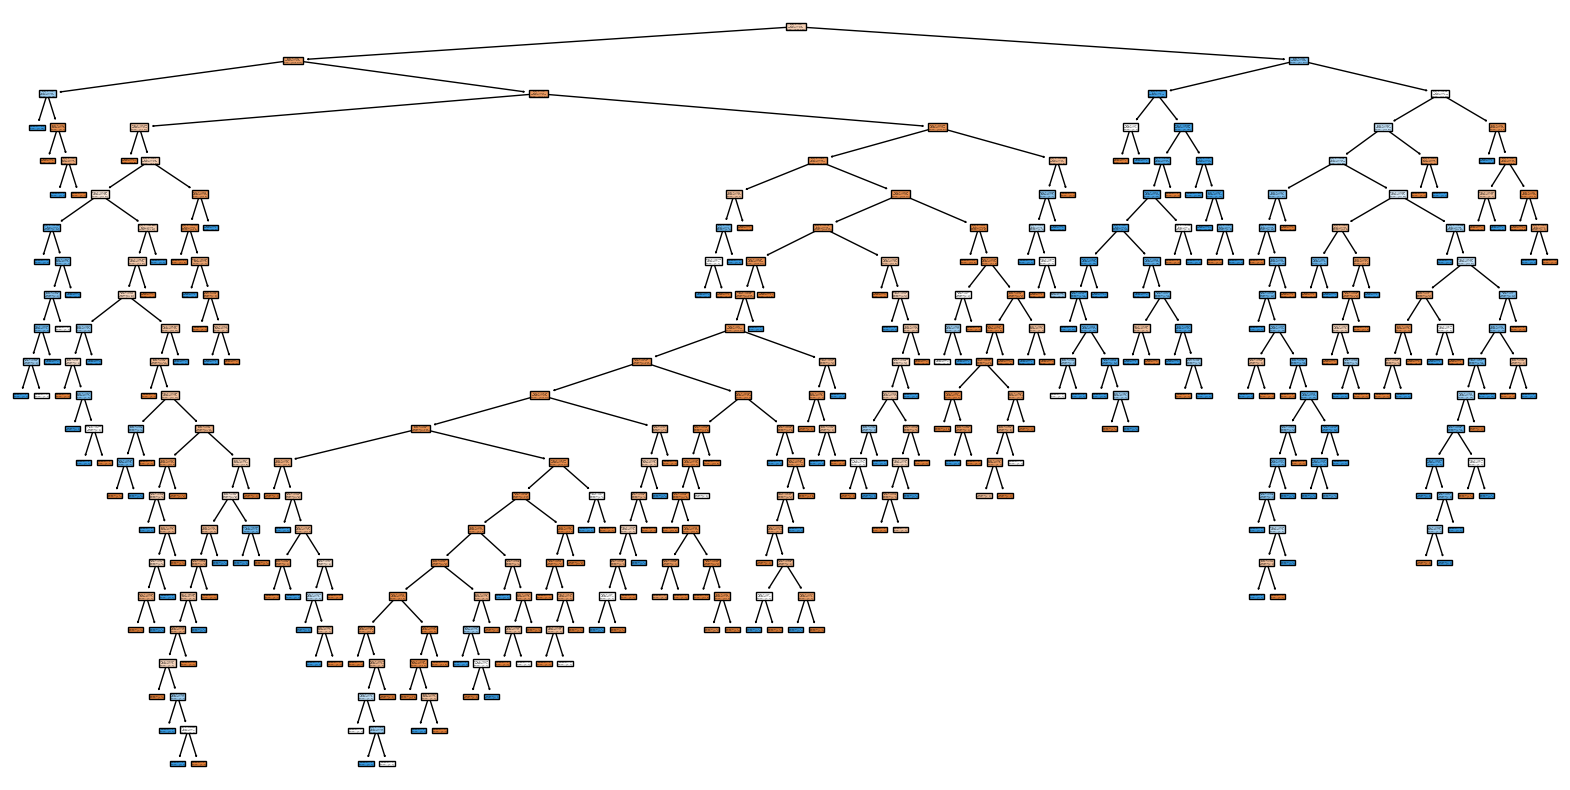

<Figure size 640x480 with 0 Axes>

In [32]:
# we can chnage fig size and type
plt.figure(figsize=(20,10))
tree.plot_tree(model.fit(X,y), filled=True)
plt.show()
#to save the fig in pdf
plt.savefig('tree.pdf', format="pdf", dpi=300)

In [37]:
# lets create confusion metrics
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
cm

array([[91, 24],
       [20, 44]], dtype=int64)

<Axes: >

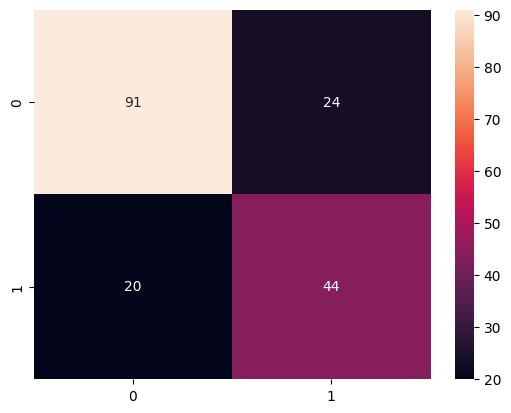

In [38]:
# lets plt it through heatmap: annotations are the numbers written in the boxes
sns.heatmap(cm, annot=True)

# K- Nearest Neighbour (KNN)

In [46]:
from sklearn.neighbors import KNeighborsClassifier
model1= KNeighborsClassifier(n_neighbors=7) # we took the model as model1 because we already had taken model
model1.fit(X_train, y_train)
y_pred= model1.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
cm

array([[90, 25],
       [27, 37]], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

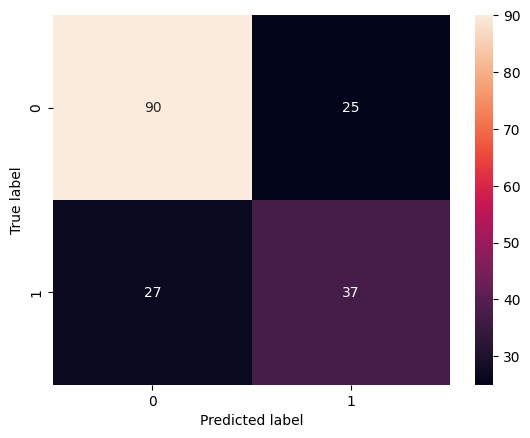

In [48]:
sns.heatmap(cm, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show

# Logistic Regression

In [49]:
# to perform logistic regression first we import from sk learn
from sklearn.linear_model import LogisticRegression
model2= LogisticRegression()
model2.fit(X_train, y_train)
y_pred= model2.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
cm


array([[98, 17],
       [20, 44]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted label')

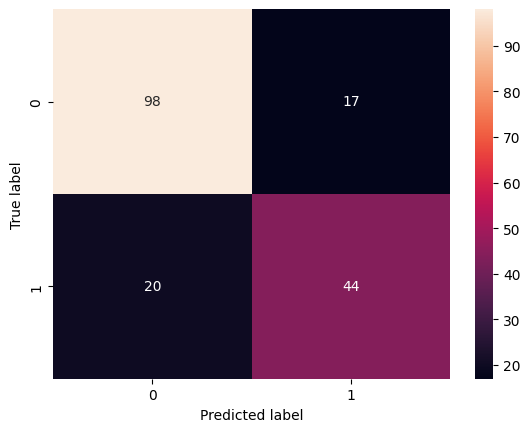

In [51]:
# Heatmap
sns.heatmap(cm, annot=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [52]:
# To check recall score
print(recall_score(y_test, y_pred))

0.6875


In [53]:
print(precision_score(y_test, y_pred))

0.7213114754098361


# Support Vector Machine

In [54]:
# To use the svm model
from sklearn.svm import SVC  # for classification we import svc and for regression we import svr
model3= SVC()
model3.fit(X_train, y_train)
y_pred= model3.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
cm

array([[109,   6],
       [ 48,  16]], dtype=int64)

In [55]:
# to check precission score
print(precision_score(y_test, y_pred))

0.7272727272727273


In [57]:
print(recall_score(y_test, y_pred))

0.25


# Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score  # to impot f1 score
model4= RandomForestClassifier()
model4.fit(X_train, y_train)
y_pred= model4.predict(X_test)
print("Confusion Metrix:", confusion_matrix(y_test, y_pred))
print('Precision Score:', precision_score(y_test,y_pred ))
print('Recall Score:', recall_score(y_test,y_pred ))
print('f1 Score:', f1_score(y_test,y_pred ))

Confusion Metrix: [[97 18]
 [15 49]]
Precision Score: 0.7313432835820896
Recall Score: 0.765625
f1 Score: 0.748091603053435


# Logistic Regression : 
## Actually its name is regression but it is a model of classification

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score  # to impot f1 score
model4= LogisticRegression()
model4.fit(X_train, y_train)
y_pred= model4.predict(X_test)
print("Confusion Metrix:", confusion_matrix(y_test, y_pred))
print('Precision Score:', precision_score(y_test,y_pred ))
print('Recall Score:', recall_score(y_test,y_pred ))
print('f1 Score:', f1_score(y_test,y_pred ))

Confusion Metrix: [[98 17]
 [20 44]]
Precision Score: 0.7213114754098361
Recall Score: 0.6875
f1 Score: 0.7040000000000001


# NAIVE Beys

In [64]:
#to import naive beys
from sklearn.naive_bayes import GaussianNB
model5= GaussianNB()
model5.fit(X_train, y_train)
y_pred= model4.predict(X_test)
print("Confusion Metrix:", confusion_matrix(y_test, y_pred))
print('Precision Score:', precision_score(y_test,y_pred ))
print('Recall Score:', recall_score(y_test,y_pred ))
print('f1 Score:', f1_score(y_test,y_pred ))

Confusion Metrix: [[98 17]
 [20 44]]
Precision Score: 0.7213114754098361
Recall Score: 0.6875
f1 Score: 0.7040000000000001


## To check which model is comparatively better with the results

In [65]:
# import libraries and models
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#define the models to be avaluated
models = [
    DecisionTreeClassifier(), KNeighborsClassifier(), RandomForestClassifier(), SVC(), LogisticRegression()
]
names= ['Decision Tree', 'Random Forest', 'KNN', 'SVM', 'LogisticRegression']

# perform k-fold cross validation for  each model
k=10
for model, name in zip(models, names):
    scores = cross_val_score(model, X, y, cv=k)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), name)) 

Accuracy: 0.77 (+/- 0.05) [Decision Tree]
Accuracy: 0.72 (+/- 0.04) [Random Forest]
Accuracy: 0.82 (+/- 0.05) [KNN]
Accuracy: 0.68 (+/- 0.05) [SVM]


c:\Users\BROTHER COMPUTER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\BROTHER COMPUTER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https

Accuracy: 0.79 (+/- 0.02) [LogisticRegression]


c:\Users\BROTHER COMPUTER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\BROTHER COMPUTER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https

## Hyper_parameter tuning: 
    1: GridSearch CV, 2: RandomSearch CV

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
# define the paramater grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [10,1, 0.1],
    'kernel': ['linear','rbf']

}
# create the grid
grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X, y)
print("Best Parameters:{}".format(grid.best_params_))
print("Best Cross_val_score:{:0.2f}".format(grid.best_score_))


Best Parameters:{'C': 1, 'gamma': 10, 'kernel': 'linear'}
Best Cross_val_score:0.79
